# Panalysis Business Analytics Case Study

**Author** Indraja Bandla


**Background**
A client of Panalysis is a publisher who has been running email marketing newsletters for a number of
years. These newsletters contain 24 different email lists and a subscriber may join one or more of these
lists.
The client sends email to these lists with different frequencies throughout the year (weekly, monthly, daily).
They use Campaign Monitor https://www.campaignmonitor.com/ to manage the subscribers and distribute
the email newsletters.
Our client has requested that Panalysis provide a report that addresses the following:
1. We have customers/personas that interact with us across a range of different services at
different times.
2. The audience is not exclusive to one website / email newsletter. By fragmenting our channels,
we lose the opportunity to build a collective audience and get to know them better and
potentially serve more targeted content in the future.
3. Fragmenting our newsletters is inefficient, and results in an inconsistent experience for our
customers.
4. The client needs to know which lists are most frequently subscribed to and whether to
decommission some newsletters and how they might potentially combine content.

**Task**
Please prepare a short report and presentation.
Use the data in the csv (see link below) to develop your methodology, and prepare a presentation on your
results to address the following:
1. How would you address the client's comments and questions above?
2. Provide descriptive statistics for each list.
3. How many subscribers are subscribed to more than one list?
4. Where a subscriber has joined more than one newsletter which combinations of lists are
subscribed to. E.g. if a subscriber has joined Artists in Australia and Balkan News and another
has joined Artists in Australia, Dog Walkers Weekly these can be represented as pairs A,B and
A,D.
5. Which lists have the greatest differences in the people who subscribe to them? E.g. People who
subscribe to Balkan News very rarely subscribe to Artists in Australia.
6. Which lists have the highest unsubscription rate.

**Please also address the following:**

● Describe how would you obtain the information from Campaign Monitor. See
https://help.campaignmonitor.com/support

● Describe the methodology you would use to tackle the questions above

The data can be downloaded from:
https://drive.google.com/file/d/0ByKnfbezExf4YmcydjVvaGNyMXc/view?usp=sharing

You are free to choose whichever tools you prefer to use to answer the questions above.

**About the Data**
The data is in a CSV file format.


| Field  | Description | Example Values         
| :- |-------------: | :-:
|DateAddedToList| The date that the subscriber was added to the list.Note that this may not be when they actually subscribed but rather when the owner of the list loaded this data into the software application | 10/04/2014 15:44
| SubscriberID | The unique identifier for this subscriber. Note that a subscriber can be subscribed to one or more lists. | ad0d6c7da2659ceda6c14c73ab3d5565e7427371a3ea4c0a6f9ab733cb47cb31
|ListID |The name of the mailing list.Note that these are fictional names.|Artists in Australia,Balkan News ,Columbian Comedy ,Dog Walkers, Weekly...
|CurrentStatus|The current status of the user.Note only subscribers marked as Active will receive email from the list.|Active, Bounced ,Unconfirmed ,Suppressed ,Deleted


# My Analysis

I downloaded the csv file and noticed the following:
- It is the data of four years(2012,2013,2014,2015)
- It has around 189,155 rows with four columns as mentioned


In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
data=pd.read_csv('./datasets/subscribers_list.csv')

In [43]:
data['year'] = pd.DatetimeIndex(data['DateAddedToList']).year

In [44]:
data['month'] = pd.DatetimeIndex(data['DateAddedToList']).month
data['day'] = pd.DatetimeIndex(data['DateAddedToList']).day

In [162]:
# I splitted DateAddedToList into year,month,day for analysis

In [161]:
data.head()

,DateAddedToList,SubscriberID,ListID,CurrentStatus,year,month,day
0,10/04/2014 15:44,69bd8f10a8f512f11cc5e15b1fb177a46395c93f6553fc...,Artists in Australia,Unsubscribed,2014,10,4
1,10/04/2014 9:40,5e8ce7d6a2fed0e786f994a4deb38ca9eb971120a86e4a...,Artists in Australia,Active,2014,10,4
2,10/04/2014 9:40,62725b4d21f794ce2ac455817fddf2b21ac0709ac02c62...,Artists in Australia,Active,2014,10,4
3,10/04/2014 9:40,e75180a3da23c7910810f1ca8998a9180f1897149adba8...,Artists in Australia,Active,2014,10,4
4,10/04/2014 9:40,cbccb0b090324a44026c6135f122b2ca26ce08214ed4ed...,Artists in Australia,Active,2014,10,4


In [177]:
data.to_csv('/Users/Indraja/documents/dsi/panalysis.panalysis.csv', encoding='utf-8',index = False)

In [163]:
data.shape

(189155, 7)

In [164]:
len(data['SubscriberID'].unique())


108858

108858 unique Subscriber id's are present in the dataset

In [6]:
data.isnull().sum()

DateAddedToList    0
SubscriberID       0
ListID             0
CurrentStatus      0
dtype: int64

In [165]:
data.dtypes #datatypes

DateAddedToList    object
SubscriberID       object
ListID             object
CurrentStatus      object
year                int32
month               int32
day                 int32
dtype: object

No null values in the dataset

In [166]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189155 entries, 0 to 189154
Data columns (total 7 columns):
DateAddedToList    189155 non-null object
SubscriberID       189155 non-null object
ListID             189155 non-null object
CurrentStatus      189155 non-null object
year               189155 non-null int32
month              189155 non-null int32
day                189155 non-null int32
dtypes: int32(3), object(4)
memory usage: 7.9+ MB


# 1. How would you address the client's comments and questions above?
1. We have customers/personas that interact with us across a range of different services at
different times

In [270]:
data['DateAddedToList'].unique()

array(['10/04/2014 15:44', '10/04/2014 9:40', '10/11/2014 12:30', ...,
       '11/12/2015 14:03', '11/12/2015 14:32', '11/12/2015 14:48'], dtype=object)

In [272]:
data['SubscriberID'].unique()

array(['69bd8f10a8f512f11cc5e15b1fb177a46395c93f6553fc695402690c4ef4e1dd',
       '5e8ce7d6a2fed0e786f994a4deb38ca9eb971120a86e4a481ed1ff04e4435e93',
       '62725b4d21f794ce2ac455817fddf2b21ac0709ac02c6275aa911ec08fb8651d',
       ...,
       '117f221d1c679fda6fc3bc7faac175e50609ee92101501efc88d6700a14fa69a',
       '5bff276dcf7cf3c64742fb4f218ec79dbe4ba650421758d78a32769c9a4f92a9',
       '1675a5cf980da3a29255bd2a0a68778b9c8314f39c3082df1dd3759b8689cf42'], dtype=object)

In [274]:
len(data['SubscriberID'].unique())

108858

In [273]:
data['ListID'].unique()

array(['Artists in Australia', 'Balkan News', 'Columbian Comedy',
       'Dog Walkers Weekly', 'Epicurean Delights', 'Fishing with Friends',
       'Gardening and Greenery', 'Hobbies for Profit',
       'Iguana Lovers Monthly', 'Jalopeno Recipe of the Week',
       'Kyoto Siteseeing', 'Llama Keepers', 'Monkey Madness',
       'Nautical Novels', 'Obscure Fact of the Day', 'Planets and Stars',
       'Quesadilla Recipies', 'Radical Reading',
       'Shopping Bargin of the Day', 'Train Trips in the Ukraine',
       'Underground Art', 'Very Funky Finds', 'Xtraordinarly GR8',
       'Your Health Tips'], dtype=object)

This clearly shows that multiple subscribers ie., 108,858 subscribers are subscribed to 24 different email list in  different years (2012,2013,2014,2015) at different times

#2. The audience is not exclusive to one website / email newsletter. By fragmenting our channels,
we lose the opportunity to build a collective audience and get to know them better and
potentially serve more targeted content in the future

we have total of 189155 records but only 108,858 unique subscribers to 24 different emails .This clearly shows that each subscribed more than one list.There seems to be many possibilities. So, in order to 

In [ ]:
#3. 

# 2.Provide descriptive statistics for each list 

In [7]:
data.describe() # overall descriptive statstics

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,189155,189155,189155,189155
unique,46547,108858,24,6
top,22/08/2012 11:44,5c8eef5243e2fe73481509a4d9834f3a706d4503a81241...,Your Health Tips,Active
freq,18755,19,34007,130623


In [8]:
data['ListID'].unique() #to know the list

array(['Artists in Australia', 'Balkan News', 'Columbian Comedy',
       'Dog Walkers Weekly', 'Epicurean Delights', 'Fishing with Friends',
       'Gardening and Greenery', 'Hobbies for Profit',
       'Iguana Lovers Monthly', 'Jalopeno Recipe of the Week',
       'Kyoto Siteseeing', 'Llama Keepers', 'Monkey Madness',
       'Nautical Novels', 'Obscure Fact of the Day', 'Planets and Stars',
       'Quesadilla Recipies', 'Radical Reading',
       'Shopping Bargin of the Day', 'Train Trips in the Ukraine',
       'Underground Art', 'Very Funky Finds', 'Xtraordinarly GR8',
       'Your Health Tips'], dtype=object)

In [9]:
data[data['ListID']=='Artists in Australia'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,3589,3589,3589,3589
unique,2706,3589,1,4
top,10/04/2014 9:40,b8dc864e80940ac6539239a0b76b9aa3510a9386db8505...,Artists in Australia,Active
freq,650,1,3589,2084


In [105]:
Artists= data[data['ListID']=='Artists in Australia']

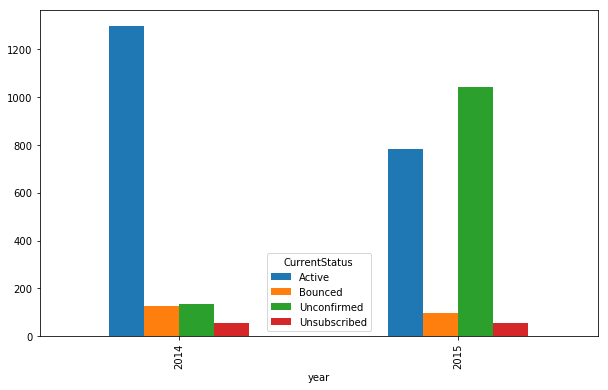

In [114]:
Artists.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [10]:
data[data['ListID']=='Balkan News'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,2089,2089,2089,2089
unique,1456,2089,1,4
top,27/03/2014 11:00,4796a57ae666dee4e6204f0dc1c07930ab9e1dfc8c9823...,Balkan News,Active
freq,544,1,2089,1084


In [115]:
Balkan=data[data['ListID']=='Balkan News']

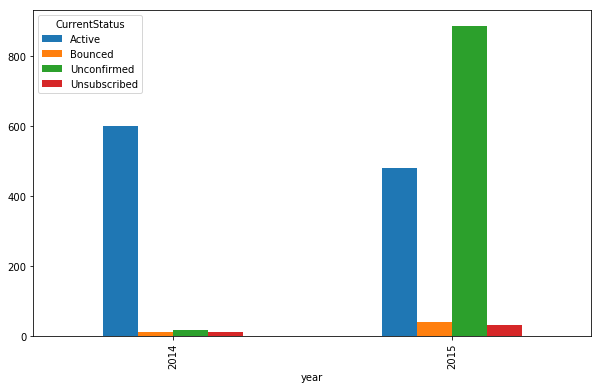

In [116]:
Balkan.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [11]:
data[data['ListID']=='Columbian Comedy'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,1977,1977,1977,1977
unique,18,1977,1,3
top,26/11/2015 16:39,dd82aa65cbeb4742877d0bcb0578e3e6553e1aec9be567...,Columbian Comedy,Active
freq,1946,1,1977,1958


In [118]:
columbia=data[data['ListID']=='Columbian Comedy']

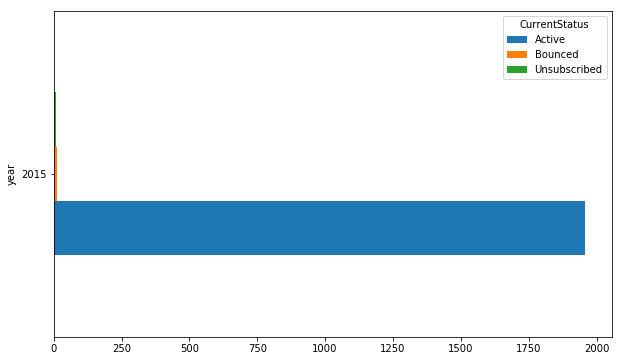

In [121]:
columbia.groupby(['year','CurrentStatus']).size().unstack().plot(kind='barh',figsize=(10,6))

In [12]:
data[data['ListID']=='Dog Walkers Weekly'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,15511,15511,15511,15511
unique,6431,15511,1,5
top,17/04/2012 15:16,9023863d82b6c01f80b84b5a22e74943e9de011d3e6b6f...,Dog Walkers Weekly,Active
freq,5622,1,15511,10996


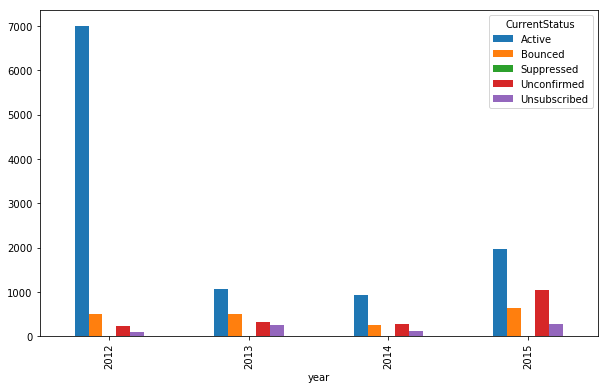

In [117]:
Dog= data[data['ListID']=='Dog Walkers Weekly']
Dog.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [13]:
data[data['ListID']=='Epicurean Delights'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,11633,11633,11633,11633
unique,9781,11633,1,6
top,11/07/2012 14:56,0bf4b63a5efa02758acb68740eb08a8d72822fdf0e1709...,Epicurean Delights,Active
freq,1043,1,11633,6943


In [122]:
Epicurean=data[data['ListID']=='Epicurean Delights']

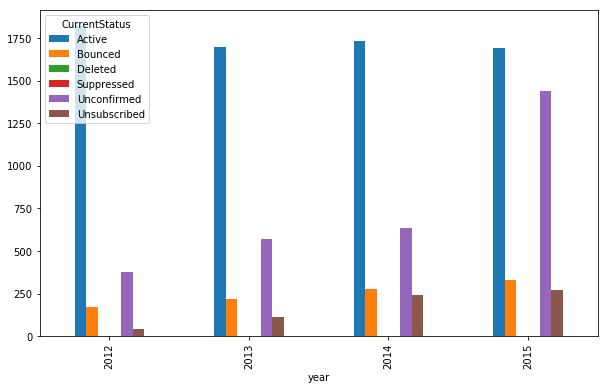

In [123]:
Epicurean.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [14]:
data[data['ListID']=='Fishing with Friends'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,1285,1285,1285,1285
unique,567,1285,1,4
top,7/07/2015 10:31,547e26e36989175eb5c71aba5419292f68710046f38fdc...,Fishing with Friends,Active
freq,671,1,1285,1136


In [124]:
Fishing=data[data['ListID']=='Fishing with Friends']

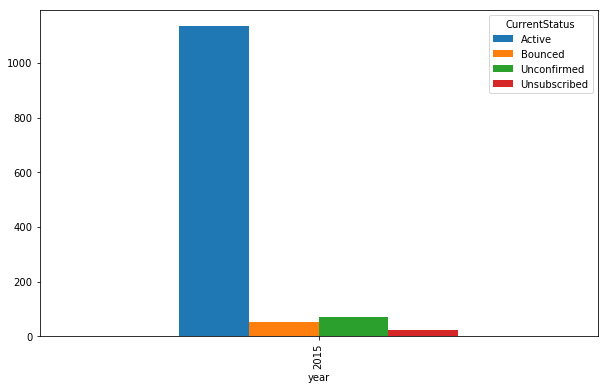

In [125]:
Fishing.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [15]:
data[data['ListID']=='Gardening and Greenery'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,7816,7816,7816,7816
unique,4168,7816,1,4
top,17/04/2012 15:48,ec119756ae25cdf6af15d62ca3bede38a871c917e55e52...,Gardening and Greenery,Active
freq,2029,1,7816,3477


In [126]:
Gardening=data[data['ListID']=='Gardening and Greenery']

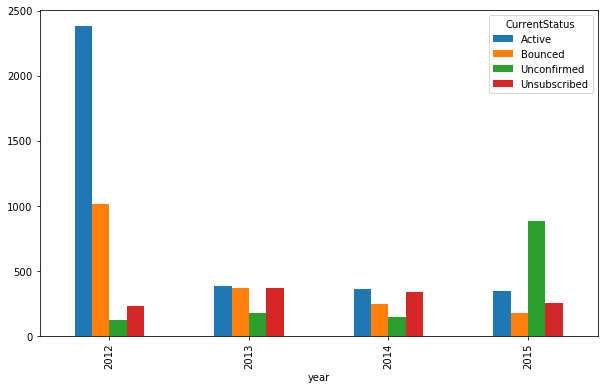

In [127]:
Gardening.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [16]:
data[data['ListID']=='Hobbies for Profit'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,2814,2814,2814,2814
unique,1350,2814,1,4
top,27/01/2015 10:09,fa541c3b0e133a00f5cf136232d92b4faecab301ab523b...,Hobbies for Profit,Active
freq,1073,1,2814,1752


In [167]:
Hobbies=data[data['ListID']=='Hobbies for Profit']

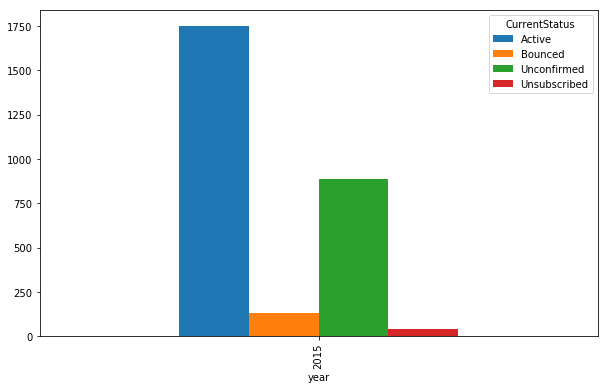

In [168]:
Hobbies.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [17]:
data[data['ListID']=='Iguana Lovers Monthly'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,20617,20617,20617,20617
unique,8671,20617,1,6
top,17/04/2012 15:20,a0aec7bd9ba400f2955dd01ee187169a315a200d222150...,Iguana Lovers Monthly,Active
freq,8587,1,20617,13054


In [169]:
Iguana=data[data['ListID']=='Iguana Lovers Monthly']

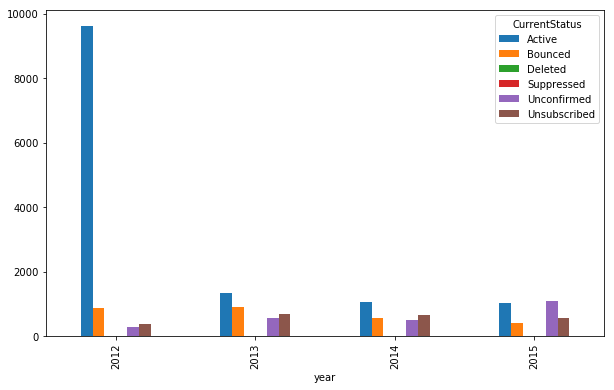

In [170]:
Iguana.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [18]:
data[data['ListID']=='Jalopeno Recipe of the Week'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,131,131,131,131
unique,41,131,1,4
top,10/03/2015 14:23,81674731bd3dc56e55b56fb2a45673768c58eb43a4e981...,Jalopeno Recipe of the Week,Active
freq,89,1,131,117


In [171]:
Jalopeno=data[data['ListID']=='Jalopeno Recipe of the Week']

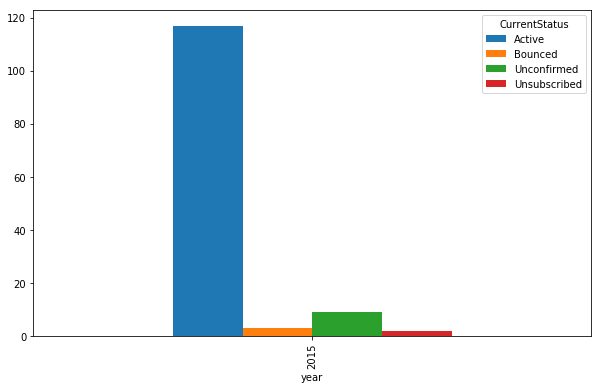

In [172]:
Jalopeno.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [19]:
data[data['ListID']=='Kyoto Siteseeing'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,1498,1498,1498,1498
unique,787,1498,1,4
top,29/07/2013 15:14,5a7d274b20c4e1570361d0ad9e17e84b86332f4bc516ff...,Kyoto Siteseeing,Active
freq,494,1,1498,1095


In [173]:
Kyoto=data[data['ListID']=='Kyoto Siteseeing']

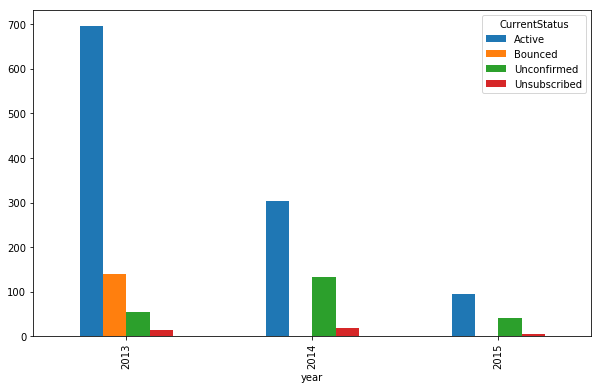

In [174]:
Kyoto.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [20]:
data[data['ListID']=='Llama Keepers'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,3255,3255,3255,3255
unique,1779,3255,1,5
top,15/08/2014 11:20,8c14783dc917df1418ccae87d4c616f72eb972065fe533...,Llama Keepers,Active
freq,906,1,3255,1721


In [178]:
Llama=data[data['ListID']=='Llama Keepers']

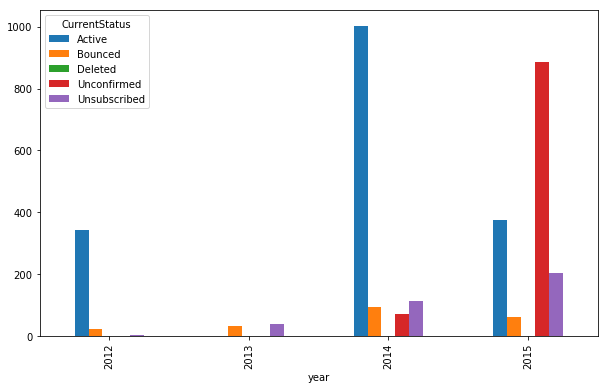

In [179]:
Llama.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [21]:
data[data['ListID']=='Monkey Madness'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,19505,19505,19505,19505
unique,6601,19505,1,6
top,7/09/2015 14:16,3b226179923caeef8e237400e7495f7a3e15f19e3a63a3...,Monkey Madness,Active
freq,4438,1,19505,13561


In [180]:
Monkey=data[data['ListID']=='Monkey Madness']

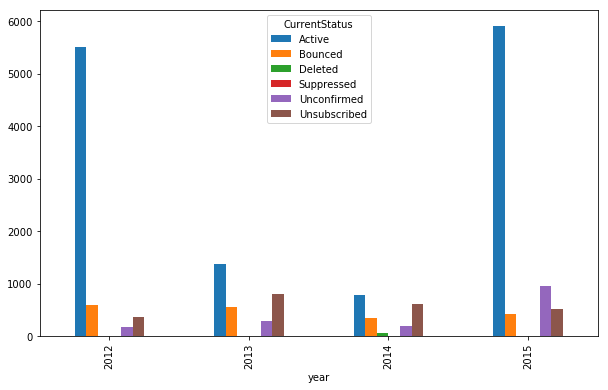

In [181]:
Monkey.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [22]:
data[data['ListID']=='Nautical Novels'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,7189,7189,7189,7189
unique,1085,7189,1,5
top,7/12/2012 13:23,0670d809431fa142cce0cc8d9b6118dd816167e5c5f85f...,Nautical Novels,Deleted
freq,2954,1,7189,3843


In [182]:
Nautical=data[data['ListID']=='Nautical Novels']

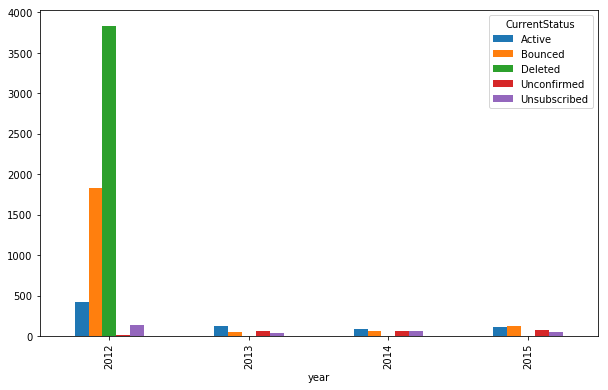

In [183]:
Nautical.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [23]:
data[data['ListID']=='Obscure Fact of the Day'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,968,968,968,968
unique,919,968,1,4
top,27/11/2015 0:20,9edcb2f1d6ec3e36be5bccc5947f850255117cbce85033...,Obscure Fact of the Day,Unconfirmed
freq,3,1,968,807


In [185]:
Obscure=data[data['ListID']=='Obscure Fact of the Day']

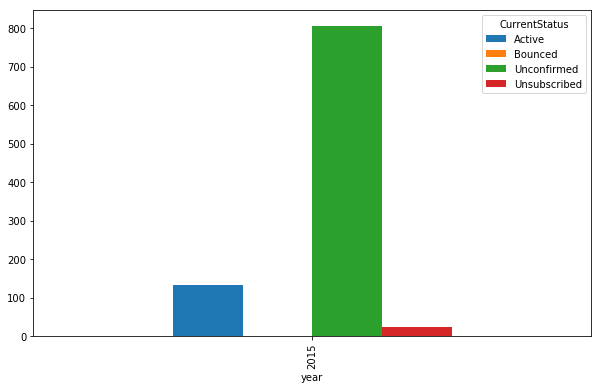

In [186]:
Obscure.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [24]:
data[data['ListID']=='Planets and Stars'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,999,999,999,999
unique,949,999,1,4
top,23/11/2015 3:49,3ccdaff592577bdd597ecd8d95bf4b5ae167061a30a5b2...,Planets and Stars,Unconfirmed
freq,3,1,999,797


In [188]:
Planets=data[data['ListID']=='Planets and Stars']

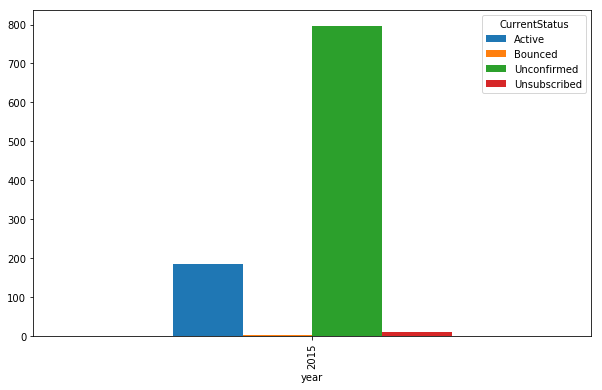

In [189]:
Planets.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [25]:
data[data['ListID']=='Quesadilla Recipies'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,4556,4556,4556,4556
unique,1128,4556,1,4
top,12/06/2015 15:42,516bdea80423c20c21938c6bebc8f3671763892cee5aab...,Quesadilla Recipies,Active
freq,1428,1,4556,3494


In [191]:
Quesadilla=data[data['ListID']=='Quesadilla Recipies']

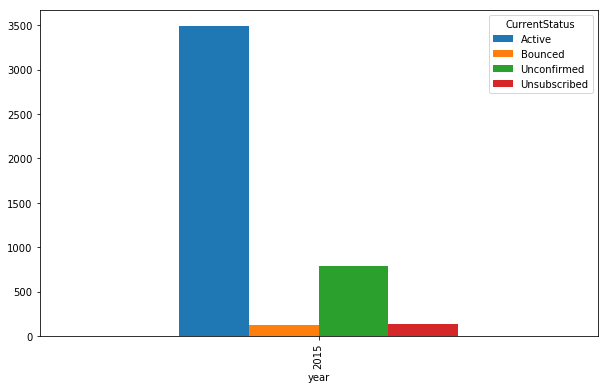

In [192]:
Quesadilla.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [26]:
data[data['ListID']=='Radical Reading'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,771,771,771,771
unique,524,771,1,5
top,5/08/2015 16:03,6675c66fb0848460330a6fbacad901f328f5d3a0895a0f...,Radical Reading,Active
freq,216,1,771,384


In [193]:
Radical=data[data['ListID']=='Radical Reading']

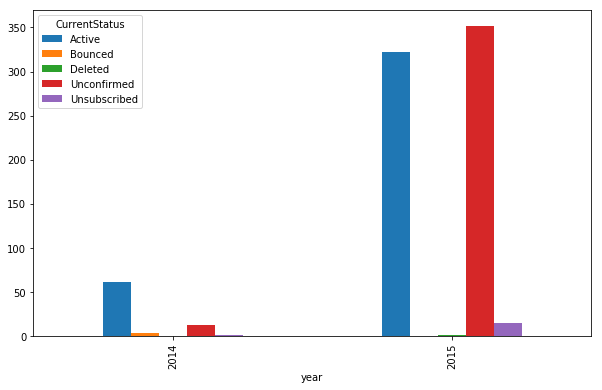

In [194]:
Radical.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [27]:
data[data['ListID']=='Shopping Bargin of the Day'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,2348,2348,2348,2348
unique,2078,2348,1,6
top,17/04/2012 15:25,915d5d779a5178c3b4ec4f209a54eaf3186a0d8008a9d8...,Shopping Bargin of the Day,Active
freq,263,1,2348,1810


In [195]:
Shopping=data[data['ListID']=='Shopping Bargin of the Day']

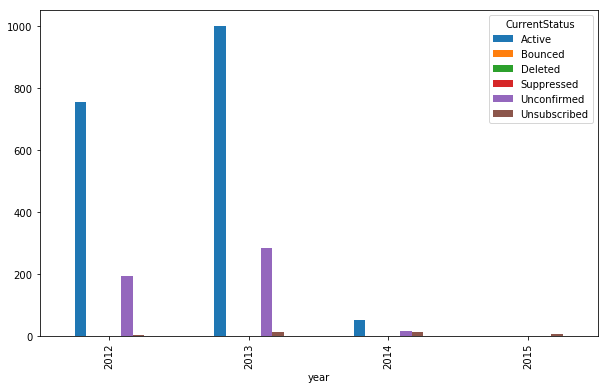

In [196]:
Shopping.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [28]:
data[data['ListID']=='Train Trips in the Ukraine'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,20470,20470,20470,20470
unique,5545,20470,1,6
top,18/04/2012 10:50,bcdb670e97d8a2f7fe4bc9c4cd11b2d37f7a798452fd76...,Train Trips in the Ukraine,Active
freq,8868,1,20470,12368


In [197]:
Train=data[data['ListID']=='Train Trips in the Ukraine']

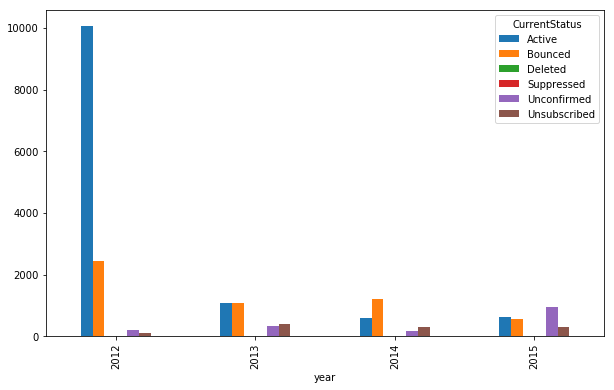

In [198]:
Train.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [29]:
data[data['ListID']=='Underground Art'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,20180,20180,20180,20180
unique,8022,20179,1,6
top,9/08/2012 10:58,93f26c4dbdd1d52f91c23d5b3be8484936d5f78490f3f0...,Underground Art,Active
freq,7887,2,20180,14113


In [199]:
Underground=data[data['ListID']=='Underground Art']

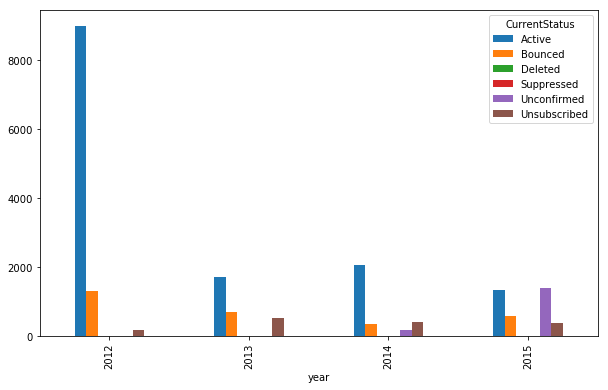

In [200]:
Underground.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [30]:
data[data['ListID']=='Very Funky Finds'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,858,858,858,858
unique,58,858,1,3
top,15/08/2012 9:48,2261dd43ad8252e9f2982bebf929f8d1662870ff70951c...,Very Funky Finds,Active
freq,364,1,858,735


In [201]:
Very_Funny=data[data['ListID']=='Very Funky Finds']

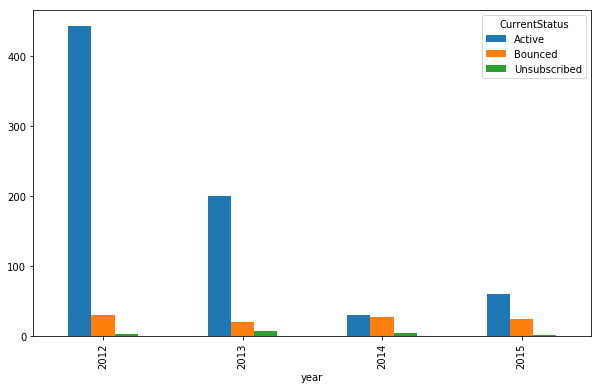

In [202]:
Very_Funny.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [31]:
data[data['ListID']=='Xtraordinarly GR8'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,5089,5089,5089,5089
unique,1393,5089,1,4
top,11/02/2014 16:35,b3eaf7b528a67d8d4f325d4efb05ba43ce00c29a576c9a...,Xtraordinarly GR8,Active
freq,1374,1,5089,3649


In [203]:
Xtraordinarly=data[data['ListID']=='Xtraordinarly GR8']

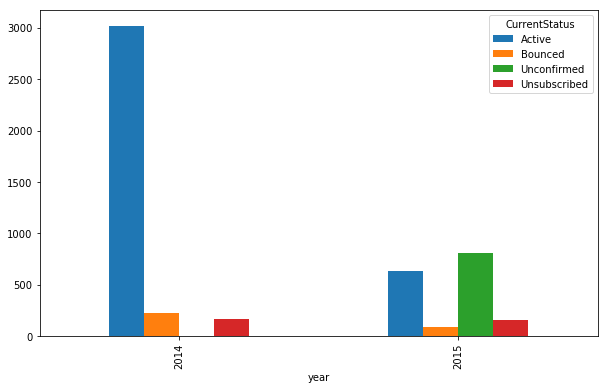

In [204]:
Xtraordinarly.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

In [32]:
data[data['ListID']=='Your Health Tips'].describe()

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,34007,34007,34007,34007
unique,14628,34007,1,1
top,22/08/2012 11:44,3d396996c4bc6b88a099b6cddadd688ca3ae99b10199e5...,Your Health Tips,Active
freq,18755,1,34007,34007


In [205]:
Your_Health=data[data['ListID']=='Your Health Tips']

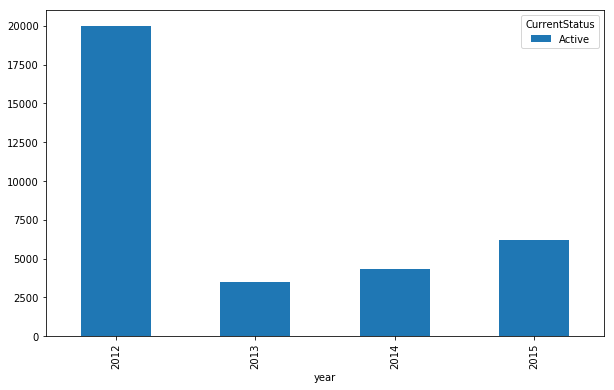

In [206]:
Your_Health.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

- These are descriptive statastics of every list .The table shows the count,number of unique values, top (most common value),frequency (most common value’s frequency)

- The bar plots shows which years the list is in active/Bounced/Unconfirmed/Suppressed/Deleted



# 6. Which lists have the highest unsubscription rate

In [99]:
data['CurrentStatus'].value_counts()

Active          130623
Unconfirmed      22079
Bounced          21107
Unsubscribed     11404
Deleted           3931
Suppressed          11
Name: CurrentStatus, dtype: int64

# Unsubscription lists for entire dataset

In [34]:
data[data['CurrentStatus']== 'Unsubscribed'].ListID.value_counts()

Iguana Lovers Monthly          2320
Monkey Madness                 2312
Underground Art                1516
Gardening and Greenery         1199
Train Trips in the Ukraine     1139
Dog Walkers Weekly              743
Epicurean Delights              673
Llama Keepers                   364
Xtraordinarly GR8               319
Nautical Novels                 302
Quesadilla Recipies             143
Artists in Australia            109
Balkan News                      46
Hobbies for Profit               41
Kyoto Siteseeing                 37
Shopping Bargin of the Day       37
Obscure Fact of the Day          25
Fishing with Friends             23
Very Funky Finds                 18
Radical Reading                  16
Planets and Stars                12
Columbian Comedy                  8
Jalopeno Recipe of the Week       2
Name: ListID, dtype: int64

Iguana Lovers Monthly has the highest Unsubscription rate

Unsubscription lists for year 2012

In [207]:
y_2012=data[data['year']==2012]

In [210]:
y_2012[y_2012['CurrentStatus']== 'Unsubscribed'].ListID.value_counts()

Iguana Lovers Monthly         396
Monkey Madness                376
Gardening and Greenery        236
Underground Art               192
Nautical Novels               145
Train Trips in the Ukraine    122
Dog Walkers Weekly             94
Epicurean Delights             40
Llama Keepers                   4
Shopping Bargin of the Day      3
Very Funky Finds                3
Name: ListID, dtype: int64

Unsubscription lists for year 2013

In [211]:
y_2013=data[data['year']==2013]

In [212]:
y_2013[y_2013['CurrentStatus']== 'Unsubscribed'].ListID.value_counts()

Monkey Madness                799
Iguana Lovers Monthly         697
Underground Art               530
Train Trips in the Ukraine    405
Gardening and Greenery        367
Dog Walkers Weekly            257
Epicurean Delights            115
Nautical Novels                43
Llama Keepers                  40
Kyoto Siteseeing               14
Shopping Bargin of the Day     13
Very Funky Finds                8
Name: ListID, dtype: int64

Unsubscription lists for year 2014

In [213]:
y_2014=data[data['year']==2014]

In [214]:
y_2014[y_2014['CurrentStatus']== 'Unsubscribed'].ListID.value_counts()

Iguana Lovers Monthly         664
Monkey Madness                615
Underground Art               405
Gardening and Greenery        340
Train Trips in the Ukraine    307
Epicurean Delights            245
Xtraordinarly GR8             164
Dog Walkers Weekly            120
Llama Keepers                 115
Nautical Novels                65
Artists in Australia           54
Kyoto Siteseeing               18
Shopping Bargin of the Day     15
Balkan News                    13
Very Funky Finds                5
Radical Reading                 1
Name: ListID, dtype: int64

Unsubscription lists for year 2015

In [215]:
y_2015=data[data['year']==2015]

In [216]:
y_2015[y_2015['CurrentStatus']== 'Unsubscribed'].ListID.value_counts()

Iguana Lovers Monthly          563
Monkey Madness                 522
Underground Art                389
Train Trips in the Ukraine     305
Epicurean Delights             273
Dog Walkers Weekly             272
Gardening and Greenery         256
Llama Keepers                  205
Xtraordinarly GR8              155
Quesadilla Recipies            143
Artists in Australia            55
Nautical Novels                 49
Hobbies for Profit              41
Balkan News                     33
Obscure Fact of the Day         25
Fishing with Friends            23
Radical Reading                 15
Planets and Stars               12
Columbian Comedy                 8
Shopping Bargin of the Day       6
Kyoto Siteseeing                 5
Very Funky Finds                 2
Jalopeno Recipe of the Week      2
Name: ListID, dtype: int64

This shows Iguana Lovers Monthly has highest numbers of unsubscribers in all the years except in 2013.This does not mean Iguana Lovers Monthly has the highest unsubscription rate.

Unsubscription rate can be calculated as 

> (number of people unsubscribed/(number of people active +unsubscribed))*100

In [69]:
pd.options.display.max_rows = 4000
data.groupby(['ListID','year']).CurrentStatus.value_counts()

ListID                       year  CurrentStatus
Artists in Australia         2014  Active            1299
                                   Unconfirmed        133
                                   Bounced            125
                                   Unsubscribed        54
                             2015  Unconfirmed       1041
                                   Active             785
                                   Bounced             97
                                   Unsubscribed        55
Balkan News                  2014  Active             602
                                   Unconfirmed         18
                                   Bounced             13
                                   Unsubscribed        13
                             2015  Unconfirmed        888
                                   Active             482
                                   Bounced             40
                                   Unsubscribed        33
Columbian Comedy       

In [230]:
combi_data=data[data['CurrentStatus']=='Active']

In [229]:
active= combi_data.ListID.value_counts()
active

Your Health Tips               34007
Underground Art                14113
Monkey Madness                 13561
Iguana Lovers Monthly          13054
Train Trips in the Ukraine     12368
Dog Walkers Weekly             10996
Epicurean Delights              6943
Xtraordinarly GR8               3649
Quesadilla Recipies             3494
Gardening and Greenery          3477
Artists in Australia            2084
Columbian Comedy                1958
Shopping Bargin of the Day      1810
Hobbies for Profit              1752
Llama Keepers                   1721
Fishing with Friends            1136
Kyoto Siteseeing                1095
Balkan News                     1084
Nautical Novels                  765
Very Funky Finds                 735
Radical Reading                  384
Planets and Stars                186
Obscure Fact of the Day          134
Jalopeno Recipe of the Week      117
Name: ListID, dtype: int64

In [231]:
unsub_data=data[data['CurrentStatus']=='Unsubscribed']

In [236]:
unsub= unsub_data.ListID.value_counts()
unsub

Iguana Lovers Monthly          2320
Monkey Madness                 2312
Underground Art                1516
Gardening and Greenery         1199
Train Trips in the Ukraine     1139
Dog Walkers Weekly              743
Epicurean Delights              673
Llama Keepers                   364
Xtraordinarly GR8               319
Nautical Novels                 302
Quesadilla Recipies             143
Artists in Australia            109
Balkan News                      46
Hobbies for Profit               41
Kyoto Siteseeing                 37
Shopping Bargin of the Day       37
Obscure Fact of the Day          25
Fishing with Friends             23
Very Funky Finds                 18
Radical Reading                  16
Planets and Stars                12
Columbian Comedy                  8
Jalopeno Recipe of the Week       2
Name: ListID, dtype: int64

In [241]:
my_list= ['Artists in Australia', 'Balkan News', 'Columbian Comedy',
       'Dog Walkers Weekly', 'Epicurean Delights', 'Fishing with Friends',
       'Gardening and Greenery', 'Hobbies for Profit',
       'Iguana Lovers Monthly', 'Jalopeno Recipe of the Week',
       'Kyoto Siteseeing', 'Llama Keepers', 'Monkey Madness',
       'Nautical Novels', 'Obscure Fact of the Day', 'Planets and Stars',
       'Quesadilla Recipies', 'Radical Reading',
       'Shopping Bargin of the Day', 'Train Trips in the Ukraine',
       'Underground Art', 'Very Funky Finds', 'Xtraordinarly GR8',
       'Your Health Tips']

In [243]:
rate=pd.DataFrame({'Active': active, 'Unsubscribed': unsub},index=my_list)
rate


,Active,Unsubscribed
Artists in Australia,2084,109.0
Balkan News,1084,46.0
Columbian Comedy,1958,8.0
Dog Walkers Weekly,10996,743.0
Epicurean Delights,6943,673.0
Fishing with Friends,1136,23.0
Gardening and Greenery,3477,1199.0
Hobbies for Profit,1752,41.0
Iguana Lovers Monthly,13054,2320.0
Jalopeno Recipe of the Week,117,2.0


In [245]:
rate['Rate']= (rate['Unsubscribed']/(rate['Active']+rate['Unsubscribed']))*100
rate

,Active,Unsubscribed,Rate
Artists in Australia,2084,109.0,4.970360
Balkan News,1084,46.0,4.070796
Columbian Comedy,1958,8.0,0.406918
Dog Walkers Weekly,10996,743.0,6.329330
Epicurean Delights,6943,673.0,8.836660
Fishing with Friends,1136,23.0,1.984469
Gardening and Greenery,3477,1199.0,25.641574
Hobbies for Profit,1752,41.0,2.286670
Iguana Lovers Monthly,13054,2320.0,15.090412
Jalopeno Recipe of the Week,117,2.0,1.680672


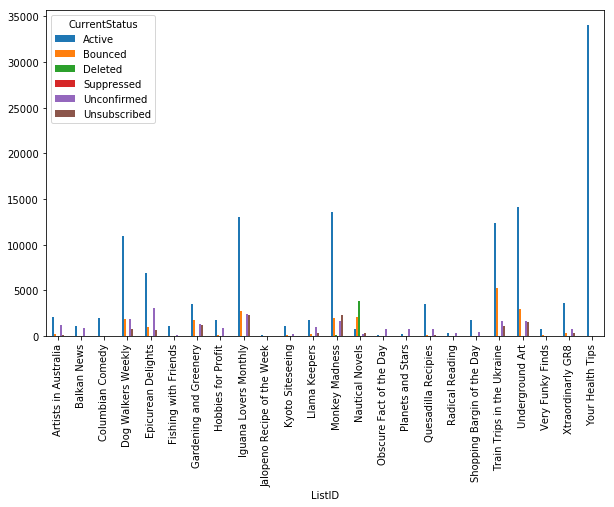

In [36]:
data.groupby(['ListID','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

# 3. How many subscribers are subscribed to more than one list?

In [103]:
data.groupby(['SubscriberID','year']).ListID.value_counts()

SubscriberID                                                      year  ListID                     
000079b501e0e82b7ef2addf1db8b860f6e3cb125d3b0b92fdb683f689cb5e68  2015  Balkan News                    1
0001c6172c43da3dde25b87e10c23861250aed7ca2ce3c4d8eae1e41f51ef600  2015  Fishing with Friends           1
0001cec76add203c3fea01001ed2729b0ddffaad9658b027307fe1932acd8771  2014  Dog Walkers Weekly             1
                                                                        Epicurean Delights             1
                                                                        Iguana Lovers Monthly          1
                                                                        Monkey Madness                 1
                                                                        Your Health Tips               1
00025e267f294e03bc204fcdfe149139acb9e914bba8277284010050f15d694b  2015  Your Health Tips               1
000269f8bcff6cc09b39562d3d6fa572fafab3628f871ea30f40931e244e

In [217]:
pd.options.display.max_rows = 4000
data.groupby(['SubscriberID']).ListID.value_counts()


SubscriberID                                                      ListID                     
000079b501e0e82b7ef2addf1db8b860f6e3cb125d3b0b92fdb683f689cb5e68  Balkan News                    1
0001c6172c43da3dde25b87e10c23861250aed7ca2ce3c4d8eae1e41f51ef600  Fishing with Friends           1
0001cec76add203c3fea01001ed2729b0ddffaad9658b027307fe1932acd8771  Dog Walkers Weekly             1
                                                                  Epicurean Delights             1
                                                                  Iguana Lovers Monthly          1
                                                                  Monkey Madness                 1
                                                                  Your Health Tips               1
00025e267f294e03bc204fcdfe149139acb9e914bba8277284010050f15d694b  Your Health Tips               1
000269f8bcff6cc09b39562d3d6fa572fafab3628f871ea30f40931e244e25cd  Monkey Madness                 1
00034ffb62abfe7

In [145]:
#subscriberid and its corresponding number of lists
from collections import Counter
count=Counter(data.SubscriberID)
count

Counter({'b48af83aba984d79ef03905524b945ae15dffe9f799e7bf6e4d8272e35aacdc6': 1,
         'c52017dc1011082ffad85d6eedb8c4d0c11ac3aa066a7fd7aaa91778bbb119a2': 1,
         '35d6e429b1a1ffee51e55aa7e84bc6d8b6d26810875aabe5fe5d8ae89eabb67f': 3,
         '383fa5048195b358c4ca37996210822ef00b1badc7855e283712bc57fd1a04f4': 2,
         '1694a2d72442205b73b2ee7e3611cea0b586c9c2f8137ffc6ec921e79df2ed68': 1,
         'a8b0f46e752c533aa474eeab83301fee2083f38603d21b156154ac60b1bb51ad': 1,
         'b189c45a5ffe17dee6f24fcf6a9e08569f91ddaec31aa4e37727b79c53094b54': 2,
         '564df9b701870e6ae5f7753e89d37ca8cd5c35c9717fcd0f4fe80decf29e94c4': 2,
         'de24d3da8c7cbecce68f3d48b71f8cadb4f989fb5d7960b2fe37761dd6cfd8f6': 1,
         'd9d14fb6f2c2052655bcc81e8a90f72a5310371565e699ad5bc3ead847be05f2': 1,
         'cc8a247ebfe23a40ec82cfe28e3959c88d11c7c499b529dfdfb37cc55b72826e': 1,
         '18bca99e5ed95ded5782830a6657d2209d45d6f55b9769d87871bf13f79e4ad8': 1,
         '9367b301688e2674c9b17115870c3b

In [148]:
#to find nmber of subscribers who su
d = dict((k, v) for k, v in count.items() if v >= 2)

In [150]:
len(d)

28850

There are 28850 subscribers who subscribed for more than one list

# 4. Where a subscriber has joined more than one newsletter which combinations of lists are subscribed to. E.g. if a subscriber has joined Artists in Australia and Balkan News and another has joined Artists in Australia, Dog Walkers Weekly these can be represented as pairs A,B and A,D.
# 5. Which lists have the greatest differences in the people who subscribe to them? E.g. People who subscribe to Balkan News very rarely subscribe to Artists in Australia.

In [256]:
# list of different combinations of listids 
combi=data.groupby(['SubscriberID']).ListID.sum().value_counts()
combi=pd.DataFrame(combi)
combi

,ListID
Your Health Tips,17817
Underground Art,13509
Monkey Madness,8495
Iguana Lovers Monthly,6457
Nautical Novels,6447
Train Trips in the Ukraine,4870
Epicurean Delights,4266
Xtraordinarly GR8,3136
Quesadilla Recipies,2908
Iguana Lovers MonthlyYour Health Tips,2689


In [155]:
#total no. of possible combinations
len(pd.DataFrame(combi))

2762

In [257]:
sum (combi['ListID'])

108858

The combinations has single list too. "Your Healthy Tips" stands top in the list .But when atleast two items are considered as an combination 'Iguana Lovers Monthly' and 'Your Health Tips' stands first with 2689 subscribers but this list has not only have active members, but also many other like Unsubscribed,deleted etc.

I would like to consider only active list and work on that.

In [226]:
#considering only Active Subscribers
combi_data=data[data['CurrentStatus']=='Active']

In [290]:
combinat=combi_data.groupby(['SubscriberID']).ListID.sum().value_counts()
combinat=pd.DataFrame(combinat)
combinat=combinat.reset_index()
combinat

,index,ListID
0,Your Health Tips,18384
1,Underground Art,9807
2,Monkey Madness,6822
3,Iguana Lovers Monthly,3472
4,Quesadilla Recipies,2719
5,Xtraordinarly GR8,2664
6,Epicurean Delights,2509
7,Iguana Lovers MonthlyYour Health Tips,2461
8,Dog Walkers Weekly,2278
9,Train Trips in the Ukraine,2112


These are combinations of all the listid's 

In [291]:
combinat.to_csv('/Users/Indraja/desktop/combinations.csv', encoding='utf-8',index = False)

In [255]:
sum (combinat['ListID'])

80317

In [246]:
len(pd.DataFrame(combinat))

2208

 In the active list, again Your Health Tips stands in the first position and the combination of 'Iguana Lovers Monthly' and 'Your Health Tips' has more number of subscribers

# API

In [277]:
import requests
import json
import re

In [285]:
api_base_url = 'https://api.createsend.com/api/v3.1/clients.json\?pretty\=true'

In [286]:
# What kind of data is this returning?
api_response = requests.get(api_base_url)
api_response.text[:100]

u'{"Code":50,"Message":"Must supply a valid HTTP Basic Authorization header"}'

In [279]:
reponse = json.loads(api_response.text)

In [280]:
type(reponse)

dict

In [282]:
api_response.status_code

401

In [284]:
from createsend import *

cs = CreateSend({'api_key': '69e35249484b8bd3057939c777511cf742ffe6d9a526f147'})
clients = cs.clients()